In [6]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [7]:
# its important to split the training and testing - Data set is stored in the path specified. 
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("Aswi/forest_fire/Training and Validation",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("Aswi/forest_fire/Testing",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [8]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [9]:
# We shall build the model here! 
# Simple CNN shall do the task, You can try other tech as well. 
# Try with other activation functions also. 
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

C:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
# It is time to compile the model, let us compile. 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
# let's get the model fit. 
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)
# Epochs you can vary! 

Epoch 1/5


C:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 434ms/step - accuracy: 0.7984 - loss: 0.4611 - val_accuracy: 0.7794 - val_loss: 0.6117
Epoch 2/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 231ms/step - accuracy: 0.9366 - loss: 0.1744 - val_accuracy: 0.9118 - val_loss: 0.4526
Epoch 3/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 236ms/step - accuracy: 0.9487 - loss: 0.1659 - val_accuracy: 0.8971 - val_loss: 0.1646
Epoch 4/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 231ms/step - accuracy: 0.9618 - loss: 0.1310 - val_accuracy: 0.8382 - val_loss: 0.2388
Epoch 5/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 222ms/step - accuracy: 0.9655 - loss: 0.1039 - val_accuracy: 0.8382 - val_loss: 0.3109


In [12]:
# Can we work on the testing dataset, the predictions happen here. 
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [13]:
predictions

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [14]:

print(len(predictions))

68


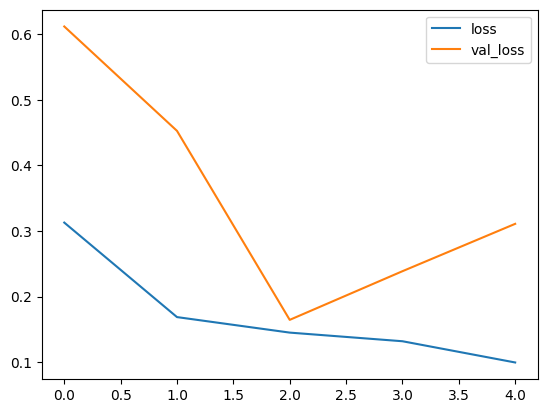

In [15]:
# it's time to plot it! Lets plot loss. 
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

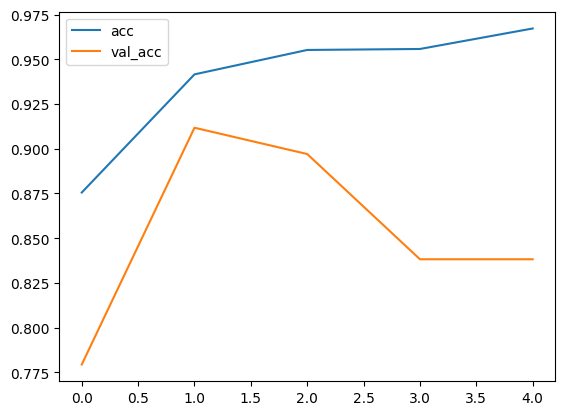

In [16]:
# How much accurate it is? 
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [17]:
# This helps in taking individual images from the Dataset, load and check results. 
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[[0.]]


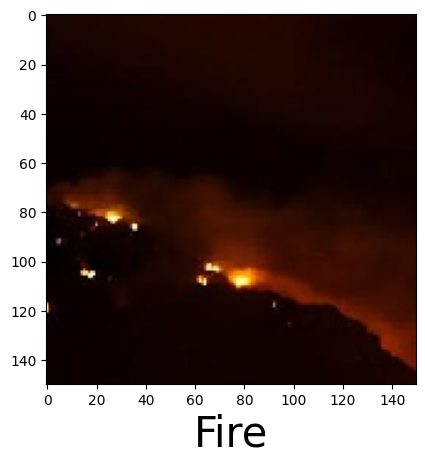

In [18]:
predictImage("Aswi/forest_fire/Testing/fire/abc172.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.]]


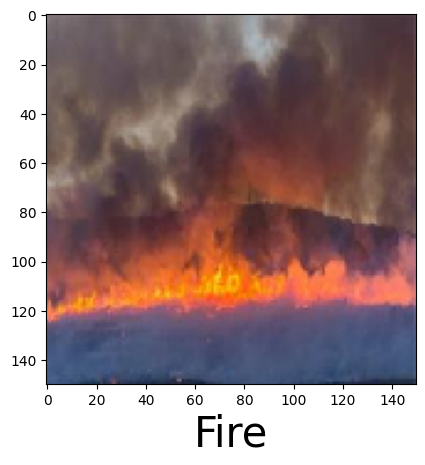

In [19]:
predictImage("Aswi/forest_fire/Testing/fire/abc178.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.]]


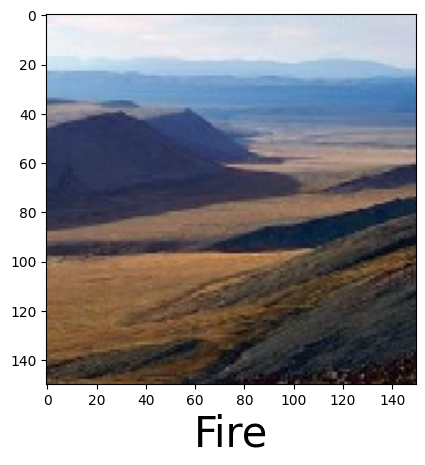

In [20]:
predictImage('Aswi/forest_fire/Testing/nofire/abc347.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[1.]]


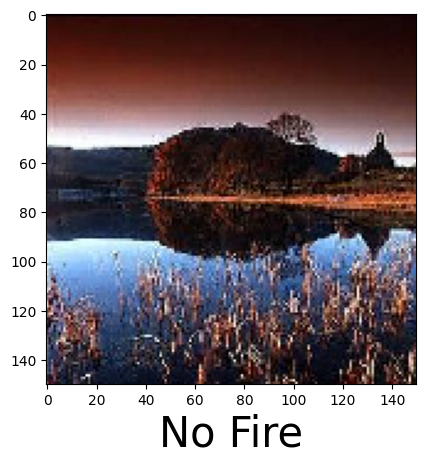

In [21]:

predictImage('Aswi/forest_fire/Testing/nofire/abc367.jpg')

In [23]:
from tensorflow.keras.models import save_model

save_model(model, "C:/Users/krish/OneDrive/Desktop/conda/venv/my_model.keras")

In [25]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

In [26]:
# Load the trained model
model = keras.models.load_model("C:/Users/krish/OneDrive/Desktop/conda/venv/my_model.keras")  # Update with your model path

In [27]:
# Define a function to perform prediction on a single frame
def predict_frame(frame):
    frame = cv2.resize(frame, (150, 150))  # Resize frame to match model input size
    frame = frame / 255.0  # Normalize pixel values
    frame = np.expand_dims(frame, axis=0)  # Add batch dimension
    prediction = model.predict(frame)
    return prediction

# Initialize video capture from default webcam (change index if using different camera)
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()  # Read frame from video capture
    if not ret:
        break

    prediction = predict_frame(frame)

    # Display prediction result on frame
    if prediction > 0.5:  # Assuming threshold of 0.5 for binary classification
        cv2.putText(frame, "No Fire", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    else:
        cv2.putText(frame, "Fire", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    cv2.imshow('Frame', frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 